Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, completeness_score

In [2]:
airlines = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
airlines1= airlines.drop (['ID#'], axis=1)

In [6]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


## Standardized Values

In [8]:
standard_values = StandardScaler().fit_transform(airlines1)
standard_values

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## MinMaxScaler

In [72]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(airlines1)

In [73]:
scaled

array([[0.01650773, 0.        , 0.        , ..., 0.5       , 0.        ,
        0.25      ],
       [0.01128788, 0.        , 0.        , ..., 0.5       , 0.        ,
        0.25      ],
       [0.02425685, 0.        , 0.        , ..., 0.5       , 0.        ,
        0.25      ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 1.        , 1.        ,
        0.25      ],
       [0.03220189, 0.        , 0.        , ..., 0.5       , 0.        ,
        0.25      ],
       [0.00176908, 0.        , 0.        , ..., 0.5       , 0.        ,
        0.25      ]])

# Kmean using Standard Scaler

In [11]:
Kmeans = KMeans(n_clusters=6, random_state=42)
Kmeans.fit(standard_values)

KMeans(n_clusters=6, random_state=42)

In [12]:
Kmeans.inertia_

21089.75687002387

In [13]:
wcss = []
for i in range(1,15):
    Kmeans = KMeans(n_clusters=i, random_state=42)
    Kmeans.fit(standard_values)
    wcss.append(Kmeans.inertia_)

In [14]:
wcss

[43988.99999999999,
 35409.5166298613,
 30899.21640879058,
 27162.166106124132,
 23707.163884815593,
 21089.75687002387,
 19166.38904378935,
 17316.725861419516,
 15960.406001471118,
 14732.22988234744,
 13706.437043029622,
 12947.112221214666,
 12431.282300776242,
 11978.09416019512]

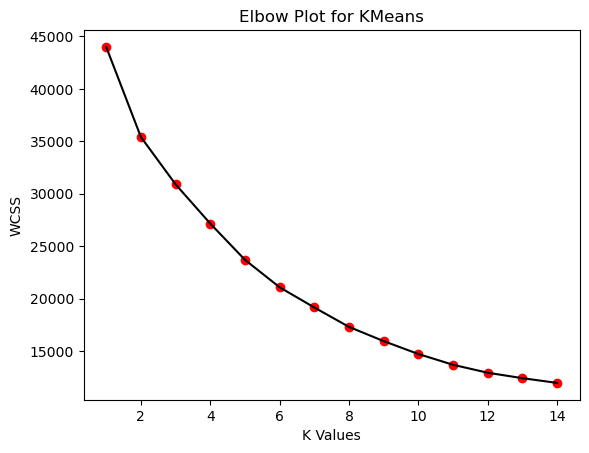

In [15]:
plt.plot(range(1,15),wcss,color = 'black')
plt.scatter(range(1,15),wcss,color='red')
plt.title('Elbow Plot for KMeans')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

### 6 or 7 would be good clusters but i choosed 6 for final model

In [16]:
final_model = KMeans(n_clusters=6, random_state=42)
final_model.fit(standard_values)
Labels = final_model.labels_

In [17]:
Labels

array([2, 2, 2, ..., 0, 2, 2])

In [18]:
airlines1 ['Kmeans_Labels']= Labels

In [19]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


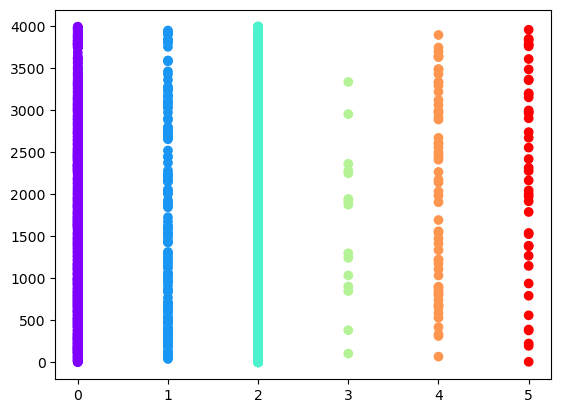

In [20]:
plt.scatter(airlines1['Kmeans_Labels'], airlines.index, c=Labels, cmap='rainbow')
plt.xticks([0,1,2,3,4,5])
plt.show()

In [21]:
kmean_grp = airlines1.groupby(['Kmeans_Labels'])
kmean_grp

In [22]:
for a,b in kmean_grp:
    print(b)
    print('_________________________________________________________________________')

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4       97752           0          4          1          1        43300   
6       84914           0          3          1          1        27482   
9      104860           0          3          1          1        28426   
11      96522           0          5          1          1        61105   
15      28495           0          4          1          1        49442   
...       ...         ...        ...        ...        ...          ...   
3979    57793           0          3          1          1        20959   
3980    28867           0          3          1          1        19169   
3985    59017           0          4          1          1        34746   
3991    39142           0          3          1          1        14981   
3996    73597           0          3          1          1        25447   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4              26      

In [23]:
kmean_grp.agg(['mean','min','max'])

Balance                   Qual_miles               \
                        mean    min      max         mean   min    max   
Kmeans_Labels                                                            
0              117252.014354    329  1125076    60.495215     0   2880   
1              188155.664336    231  1704838   464.573427     0   4301   
2               43519.741845      0   456509    42.457511     0   2788   
3              138061.400000  15835   737514    78.800000     0   1182   
4              119660.491803   6015   529886  5351.065574  2556  11148   
5               68876.581395   4148   443003    23.255814     0   1000   

              cc1_miles         cc2_miles  ... Flight_miles_12mo  \
                   mean min max      mean  ...               max   
Kmeans_Labels                              ...                     
0              3.704944   1   5  1.000000  ...              4130   
1              2.244755   1   5  1.000000  ...             30817   
2              1.226742   1   3  1.000000  ...              5446   
3              3.466667   1   5  1.000000  ...              2300   
4              2.000000   1   5  1.000000  ...              7741   
5              1.139535   1   4  2.348837  ...              5000   

              Flight_trans_12         Days_since_enroll                Award?  \
                         mean min max              mean   min   max      mean   
Kmeans_Labels                                                                   
0                    1.037480   0  11       4896.791866   486  8296  0.649123   
1                   16.552448   1  53       4679.251748  1041  8296  0.797203   
2                    0.616593   0  11       3696.446234     2  8296  0.198953   
3                    1.600000   0   9       4613.866667  1054  6980  0.533333   
4                    2.868852   0  15       3971.491803    30  8296  0.557377   
5                    2.209302   0  24       3968.930233   531  8296  0.395349   

                       
              min max  
Kmeans_Labels          
0               0   1  
1               0   1  
2               0   1  
3               0   1  
4               0   1  
5               0   1  

[6 rows x 33 columns]

## Evaluate the model

In [24]:
silhouette_score(airlines1.iloc[:,0:11], Labels)

0.11304164326909422

## Kmean using MinMax Scaler

### Checking best cluster for Kmean by using MinMax Scaler

In [25]:
wcss = []
for i in range(1,15):
    Kmeans = KMeans(n_clusters=i, random_state=42)
    Kmeans.fit(scaled)
    wcss.append(Kmeans.inertia_)

In [26]:
wcss

[1830.7932128584112,
 823.6756984125207,
 625.1684881570719,
 436.7088576193261,
 348.9433217254136,
 315.3155964842891,
 287.73100544224263,
 263.2132188914899,
 245.4061707045836,
 226.1081210825213,
 214.83935020591383,
 206.46790901305306,
 195.86036463695035,
 190.06536500679093]

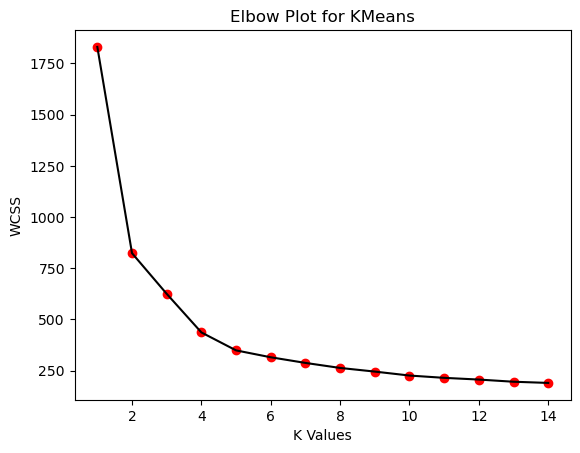

In [27]:
plt.plot(range(1,15),wcss,color = 'black')
plt.scatter(range(1,15),wcss,color='red')
plt.title('Elbow Plot for KMeans')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

In [28]:
final_model_minmax = KMeans(n_clusters=2, random_state=42)
final_model_minmax.fit(scaled)
Labels_Minmax = final_model_minmax.labels_

In [29]:
Labels_Minmax

array([1, 1, 1, ..., 0, 1, 1])

In [30]:
airlines1 ['Kmeans_Labels_MinMax']= Labels_Minmax

In [31]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels,Kmeans_Labels_MinMax
0,28143,0,1,1,1,174,1,0,0,7000,0,2,1
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0


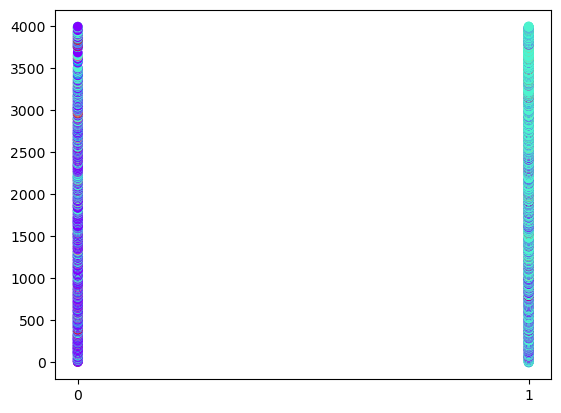

In [32]:
plt.scatter(airlines1['Kmeans_Labels_MinMax'], airlines.index, c=Labels, cmap='rainbow')
plt.xticks([0,1])
plt.show()

In [33]:
kmean_grp_MinMax = airlines1.groupby('Kmeans_Labels_MinMax')
kmean_grp_MinMax

In [34]:
for c,d in kmean_grp_MinMax:
    print(d)
    print('_________________________________________________________________________')

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4       97752           0          4          1          1        43300   
7       20856           0          1          1          1         5250   
8      443003           0          3          2          1         1753   
9      104860           0          3          1          1        28426   
11      96522           0          5          1          1        61105   
...       ...         ...        ...        ...        ...          ...   
3987    11933           0          1          1          1          249   
3989     2622           0          1          1          1         1625   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4              26      

In [35]:
kmean_grp_MinMax.agg(['mean','min','max'])

Balance               Qual_miles             \
                              mean min      max        mean min    max   
Kmeans_Labels_MinMax                                                     
0                     97053.051317   0  1704838  240.196489   0  11148   
1                     59807.839555  50  1125076   87.602462   0  10074   

                     cc1_miles         cc2_miles  ... Flight_trans_12  \
                          mean min max      mean  ...             max   
Kmeans_Labels_MinMax                              ...                   
0                     2.661715   1   5   1.01553  ...              53   
1                     1.705322   1   5   1.01390  ...              29   

                     Days_since_enroll            Award?          \
                                  mean  min   max   mean min max   
Kmeans_Labels_MinMax                                               
0                          4625.062120  301  8296    1.0   1   1   
1                          3820.652105    2  8296    0.0   0   0   

                     Kmeans_Labels          
                              mean min max  
Kmeans_Labels_MinMax                        
0                         0.909521   0   5  
1                         1.694202   0   5  

[2 rows x 36 columns]

In [36]:
# Evaluating Model
silhouette_score(airlines1.iloc[:,0:11], Labels_Minmax)

0.12945774208664765

## DBSCAN using Standard Scaler

In [37]:
from sklearn.cluster import DBSCAN

In [130]:
Dbscan=DBSCAN(eps=2,min_samples=23)
Dbscan.fit(standard_values)
Labels_dbscan = Dbscan.labels_

In [131]:
Labels_dbscan

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [132]:
airlines1['Dbscan_Labels']=Labels_dbscan

In [133]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels,Kmeans_Labels_MinMax,Dbscan_Labels,Dbscan_Labels_MinMax,Labels_Hierarchical,Labels_Hierarchical_MinMax
0,28143,0,1,1,1,174,1,0,0,7000,0,2,1,0,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1,0,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,0,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1,0,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1,1,1,0


In [134]:
grp = airlines1.groupby('Dbscan_Labels')
grp

In [135]:
for e,f in grp:
    print(f)
    print("_____________________________________________________________________")
    print("")

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
21     185681        2024          1          1          1        13300   
43     619393           0          3          1          1        15008   
50     108137           0          1          1          1         6368   
65      53914           0          3          1          1        33767   
...       ...         ...        ...        ...        ...          ...   
3897   179832        2954          3          1          1        18218   
3911    55922        2273          1          1          1         8104   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   
3959    13942           0          1          2          1         5822   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43      

In [137]:
grp.agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels,Kmeans_Labels_MinMax,Dbscan_Labels_MinMax,Labels_Hierarchical,Labels_Hierarchical_MinMax
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Dbscan_Labels,,,,,,,,,,,,,,,,
-1,204472.588629,1444.143813,2.565217,1.19398,1.16388,43115.321070,23.929766,2863.759197,8.284281,4610.046823,0.692308,2.036789,0.307692,0.692308,0.879599,0.307692
0,57270.911377,27.584089,1.693322,1.00000,1.00000,9726.787304,8.844188,183.393652,0.543281,3815.308326,0.000000,1.644683,1.000000,0.000000,0.996290,1.000000
1,73983.653061,60.907378,2.638148,1.00000,1.00000,25175.489011,13.959969,422.751962,1.332810,4580.672684,1.000000,0.795918,0.000000,1.000000,0.985871,0.000000


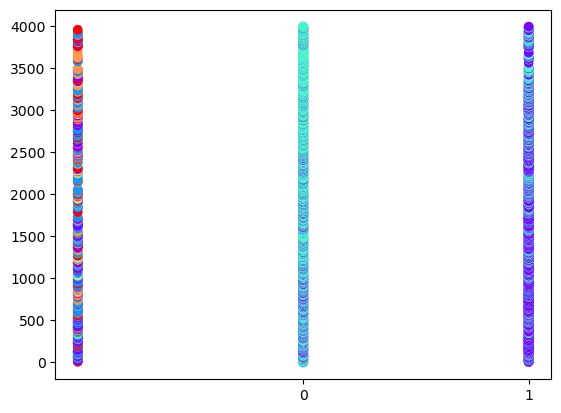

In [138]:
plt.scatter(airlines1['Dbscan_Labels'], airlines1.index, c=Labels, cmap='rainbow')
plt.xticks([0,1])
plt.show()

In [139]:
silhouette_score(airlines1.iloc[:,0:11], Labels_dbscan)

0.05732725706118256

## Dbscan using MinMax Scaler

In [48]:
Dbscan1=DBSCAN(eps=1,min_samples=20)
Dbscan1.fit(scaled)
Labels_dbscan_MinMax = Dbscan1.labels_

In [49]:
Labels_dbscan_MinMax

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [50]:
airlines1['Dbscan_Labels_MinMax']=Labels_dbscan_MinMax

In [51]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels,Kmeans_Labels_MinMax,Dbscan_Labels,Dbscan_Labels_MinMax
0,28143,0,1,1,1,174,1,0,0,7000,0,2,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1,1


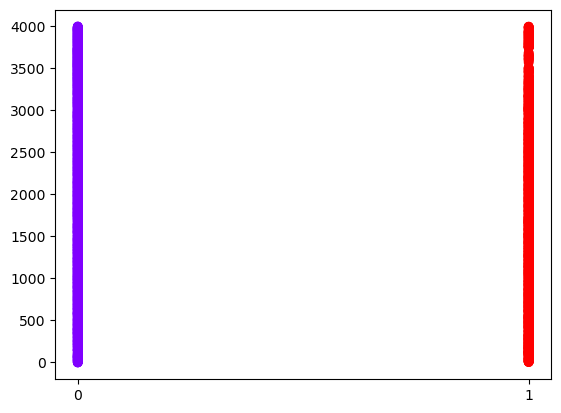

In [74]:
plt.scatter(airlines1['Dbscan_Labels_MinMax'], airlines1.index, c=Labels_dbscan_MinMax, cmap='rainbow')
plt.xticks([0,1])
plt.show()

In [75]:
dbscan_grp = airlines1.groupby('Dbscan_Labels_MinMax')
dbscan_grp

In [76]:
for g,h in grp:
    print(h)
    print("_____________________________________________________________________")
    print("")

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
21     185681        2024          1          1          1        13300   
43     619393           0          3          1          1        15008   
50     108137           0          1          1          1         6368   
65      53914           0          3          1          1        33767   
...       ...         ...        ...        ...        ...          ...   
3897   179832        2954          3          1          1        18218   
3911    55922        2273          1          1          1         8104   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   
3959    13942           0          1          2          1         5822   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43      

In [77]:
dbscan_grp.agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels,Kmeans_Labels_MinMax,Dbscan_Labels,Labels_Hierarchical
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Dbscan_Labels_MinMax,,,,,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.694202,1.0,-0.036537,0.987689
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,0.909521,0.0,0.720459,0.978393


In [78]:
# Evaluating Model
silhouette_score(airlines1.iloc[:,0:11], Labels_dbscan_MinMax)

0.12945774208664765

## Hierarchical using Standard Scaler

In [152]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
model.fit(standard_values)
Labels_Hierarchical = model.labels_

In [153]:
Labels_Hierarchical

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [154]:
airlines1["Labels_Hierarchical"]= Labels_Hierarchical

In [155]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels,Kmeans_Labels_MinMax,Dbscan_Labels,Dbscan_Labels_MinMax,Labels_Hierarchical,Labels_Hierarchical_MinMax
0,28143,0,1,1,1,174,1,0,0,7000,0,2,1,0,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1,0,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,0,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1,0,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1,1,1,0


In [156]:
grp1 =airlines1.groupby('Labels_Hierarchical')
grp1

In [157]:
for i,j in grp1:
    print(j)
    print("_____________________________________________________________________")

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
42      60313           0          1          1          1        10000   
50     108137           0          1          1          1         6368   
59      95118           0          3          1          1        23188   
65      53914           0          3          1          1        33767   
...       ...         ...        ...        ...        ...          ...   
3883   126167           0          5          1          1       190160   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   
3950    59650           0          1          1          1         5050   
3959    13942           0          1          2          1         5822   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43      

In [158]:
grp1.agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels,Kmeans_Labels_MinMax,Dbscan_Labels,Dbscan_Labels_MinMax,Labels_Hierarchical_MinMax
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Labels_Hierarchical,,,,,,,,,,,,,,,,
0,117123.664706,255.752941,2.252941,1.341176,1.000000,37437.170588,26.729412,4066.623529,11.882353,4701.688235,0.705882,1.900000,0.294118,-0.700000,0.705882,0.294118
1,65902.071655,137.370703,2.033580,1.000000,1.000793,15571.369910,10.724484,270.585405,0.818350,4072.294553,0.350344,1.383924,0.649656,0.301163,0.350344,0.649656
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,3.000000,0.466667,-1.000000,0.533333,0.466667
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000
4,806433.285714,383.214286,3.571429,1.000000,1.000000,58412.321429,21.214286,1344.392857,5.607143,6835.892857,0.857143,0.250000,0.142857,-0.928571,0.857143,0.142857


In [159]:
from scipy.cluster import hierarchy

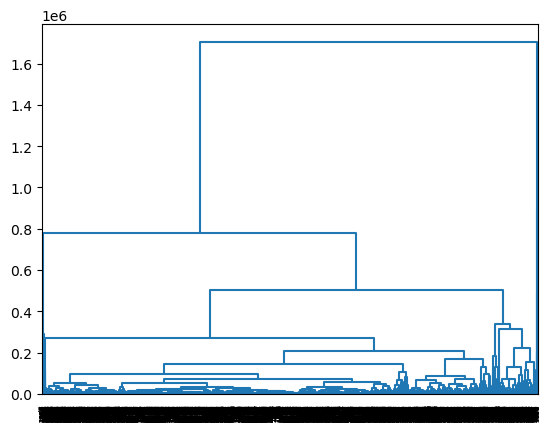

In [63]:
Diagram = hierarchy.linkage(airlines1.iloc[:,:11], method='complete')
dn = hierarchy.dendrogram(Diagram, color_threshold=0.4)

In [160]:
# Evaluating Model
silhouette_score(airlines1.iloc[:,0:11], Labels_Hierarchical)

0.31132530328816127

## Hierarchical using MinMax Scaler

In [81]:
model1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
model1.fit(scaled)
Labels_Hierarchical_MinMax = model1.labels_

In [82]:
Labels_Hierarchical_MinMax

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [83]:
airlines1["Labels_Hierarchical_MinMax"]= Labels_Hierarchical_MinMax

In [84]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels,Kmeans_Labels_MinMax,Dbscan_Labels,Dbscan_Labels_MinMax,Labels_Hierarchical,Labels_Hierarchical_MinMax
0,28143,0,1,1,1,174,1,0,0,7000,0,2,1,0,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1,0,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,0,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1,0,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1,1,1,0


In [85]:
grp2 =airlines1.groupby('Labels_Hierarchical_MinMax')
grp2

In [86]:
for k,l in grp1:
    print(l)
    print("_____________________________________________________________________")

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
42      60313           0          1          1          1        10000   
50     108137           0          1          1          1         6368   
59      95118           0          3          1          1        23188   
65      53914           0          3          1          1        33767   
...       ...         ...        ...        ...        ...          ...   
3883   126167           0          5          1          1       190160   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   
3950    59650           0          1          1          1         5050   
3959    13942           0          1          2          1         5822   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43      

In [87]:
grp2.agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans_Labels,Kmeans_Labels_MinMax,Dbscan_Labels,Dbscan_Labels_MinMax,Labels_Hierarchical
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Labels_Hierarchical_MinMax,,,,,,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,0.909521,0.0,0.720459,1.0,0.978393
1,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.694202,1.0,-0.036537,0.0,0.987689


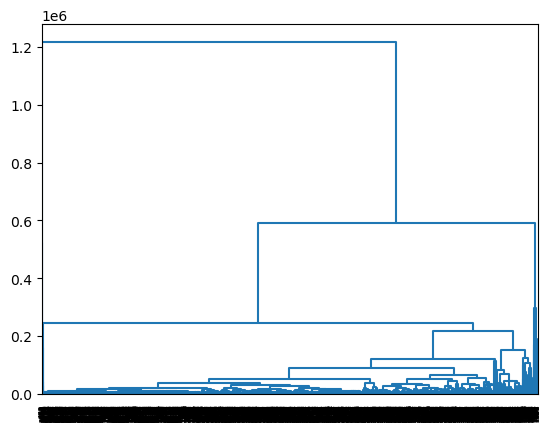

In [88]:
Diagram = hierarchy.linkage(airlines1.iloc[:,:11], method='average')
dn = hierarchy.dendrogram(Diagram, color_threshold=0.4)

In [89]:
# Evaluating Model
silhouette_score(airlines1.iloc[:,0:11], Labels_Hierarchical_MinMax)

0.12945774208664765

# Silhouette_Score_Table

In [90]:
from pandas import DataFrame, Series

In [140]:
All_Silhouette_Score=[['Kmean_standardscaler',0.11304164326909422],
                      ['Kmean_minmaxscaler',0.12945774208664765],
                      ['Dbscan_Standard_Values',0.05732725706118256],
                      ['Dbscan_MinMax',0.12945774208664765], 
                      ['Hierarchical_standard_scale',0.31132530328816127], 
                      ['Hierarchical_MinMax',0.12945774208664765]]

In [141]:
Silhouette_Score_Table= pd.DataFrame(All_Silhouette_Score, columns=['Model','Silhouette_Score'])

In [142]:
Silhouette_Score_Table

,Model,Silhouette_Score
0,Kmean_standardscaler,0.113042
1,Kmean_minmaxscaler,0.129458
2,Dbscan_Standard_Values,0.057327
3,Dbscan_MinMax,0.129458
4,Hierarchical_standard_scale,0.311325
5,Hierarchical_MinMax,0.129458
